In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import dateutils, sys
from netCDF4 import Dataset
from scipy import stats


In [2]:
color1 = 'k'; linewidth1 = 1.0
color2 = 'r'; linewidth2 = 1.0
color3 = 'g'; linewidth3 = 1.0
color4 = 'b'; linewidth4 = 1.0

obtypes = 'All Insitu'

expt1='full_atmos.nc'
expt2='full_coupled_frac.nc'
expt3='full_coupled_iau.nc'


lexpt1='Atmos'
lexpt2='Coupled '
lexpt3='Coupled IAU'


In [3]:
rcParams['figure.subplot.left'] = 0.1 
rcParams['figure.subplot.top'] = 0.85 
rcParams['legend.fontsize']=12
nc_expt1 = Dataset(expt1)
nc_expt2 = Dataset(expt2)
nc_expt3 = Dataset(expt3)

times = nc_expt1['times'][:].astype(np.int32)
times3 = nc_expt3['times'][:].astype(np.int32)
dates = [dateutils.hrstodate(time) for time in times] 
dates_txt = '%s-%s' % (dates[0],dates[-1])
wind_counts1 = nc_expt1['wind_obcounts'][:]
temp_counts1 = nc_expt1['temp_obcounts'][:]
temp_fits1 = nc_expt1['omf_rmstemp'][:]
temp_bias1 = nc_expt1['omf_biastemp'][:]
wind_fits1  = nc_expt1['omf_rmswind'][:]
temp_fits2 = nc_expt2['omf_rmstemp'][:]
temp_bias2 = nc_expt2['omf_biastemp'][:]
wind_fits2  = nc_expt2['omf_rmswind'][:]
temp_fits3 = nc_expt3['omf_rmstemp'][:]
temp_bias3 = nc_expt3['omf_biastemp'][:]
wind_fits3  = nc_expt3['omf_rmswind'][:]


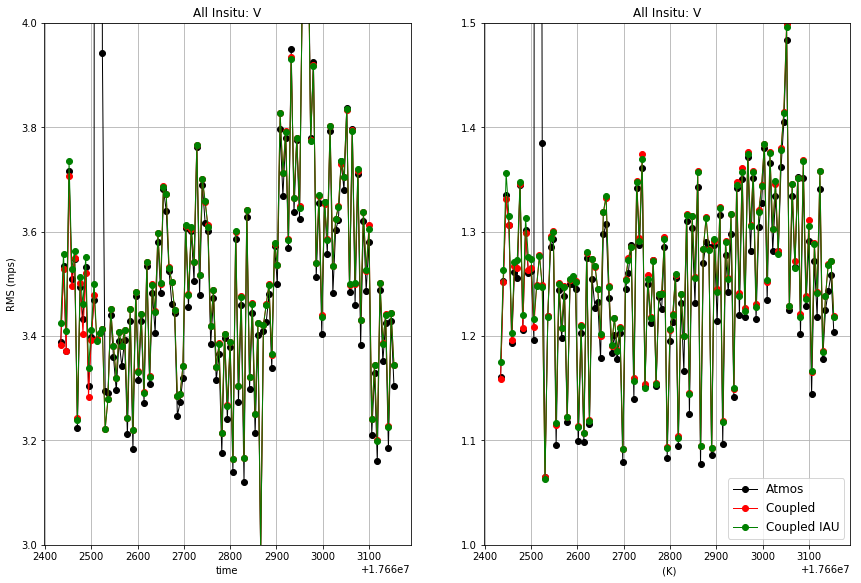

In [7]:
fig = plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
wind_fits1mean = wind_fits1.mean(axis=1)
wind_fits2mean = wind_fits2.mean(axis=1)
wind_fits3mean = wind_fits3.mean(axis=1)
plt.plot(times,wind_fits1mean,color=color1,linewidth=linewidth1,marker='o',label=lexpt1)
plt.plot(times,wind_fits2mean,color=color2,linewidth=linewidth2,marker='o',label=lexpt2)
plt.plot(times,wind_fits3mean,color=color3,linewidth=linewidth2,marker='o',label=lexpt3)

plt.ylabel('RMS (mps)')
plt.title('%s: V'% obtypes)
plt.xlabel('time')
plt.axis('tight')
plt.ylim(3,4)
plt.grid(True)

plt.subplot(1,2,2)
temp_fits1mean = np.sqrt(temp_fits1[0,0:10]).mean(axis=1)
temp_fits2mean = np.sqrt(temp_fits2).mean(axis=1) 
temp_fits3mean = np.sqrt(temp_fits3).mean(axis=1) 
plt.plot(times,temp_fits1mean,color=color1,linewidth=linewidth1,marker='o',label=lexpt1)
plt.plot(times,temp_fits2mean,color=color2,linewidth=linewidth2,marker='o',label=lexpt2)
plt.plot(times,temp_fits3mean,color=color3,linewidth=linewidth4,marker='o',label=lexpt3)
plt.xlabel('time')
plt.xlabel(' (K)')
plt.title('%s: V'% obtypes)
plt.axis('tight')
plt.ylim(1,1.5)
plt.grid(True)
plt.legend(loc=0)



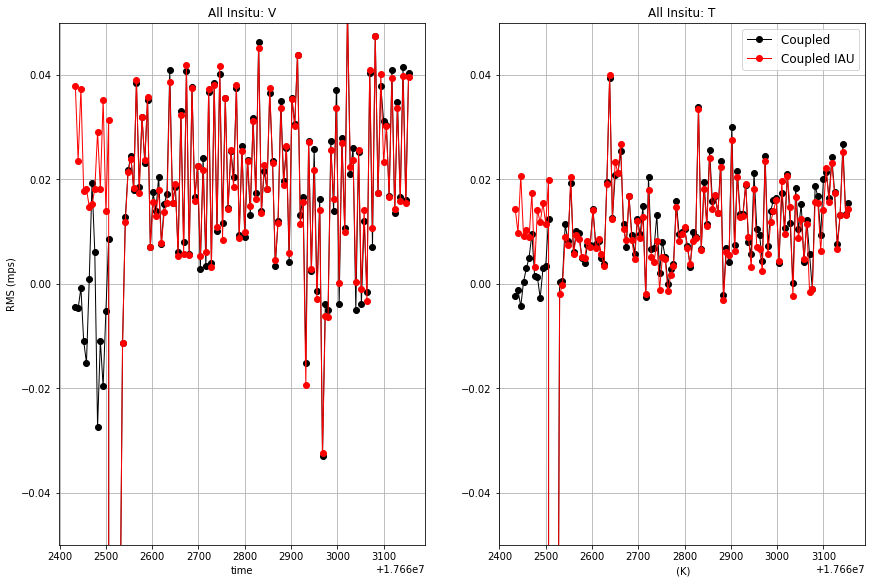

In [8]:
fig = plt.figure(figsize=(14,10))
nt=temp_bias3.shape
plt.subplot(1,2,1)
plt.plot(times,wind_fits2mean-wind_fits1mean,color=color1,linewidth=linewidth2,marker='o',label=lexpt2)
plt.plot(times,wind_fits3mean-wind_fits1mean,color=color2,linewidth=linewidth2,marker='o',label=lexpt3)

plt.ylabel('RMS (mps)')
plt.title('%s: V'% obtypes)
plt.xlabel('time')
plt.axis('tight')
plt.ylim(-0.05,0.05)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(times,temp_fits2mean-temp_fits1mean,color=color1,linewidth=linewidth2,marker='o',label=lexpt2)
plt.plot(times,temp_fits3mean-temp_fits1mean,color=color2,linewidth=linewidth3,marker='o',label=lexpt3)
plt.xlabel('time')
plt.xlabel(' (K)')
plt.title('%s: T'% obtypes)
plt.axis('tight')
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.legend(loc=0)



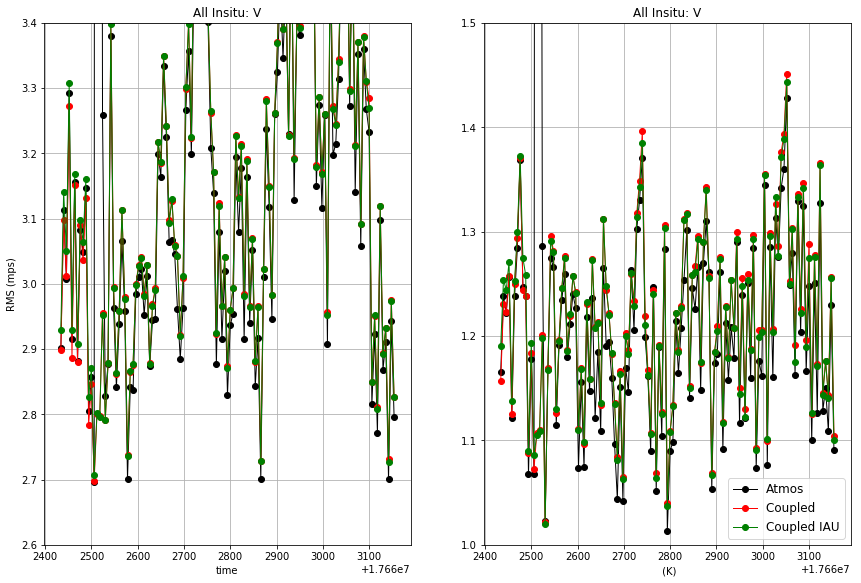

In [11]:
fig = plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
wind_fits1mean = wind_fits1[:,0:10].mean(axis=1)
wind_fits2mean = wind_fits2[:,0:10].mean(axis=1)
wind_fits3mean = wind_fits3[:,0:10].mean(axis=1)
plt.plot(times,wind_fits1mean,color=color1,linewidth=linewidth1,marker='o',label=lexpt1)
plt.plot(times,wind_fits2mean,color=color2,linewidth=linewidth2,marker='o',label=lexpt2)
plt.plot(times,wind_fits3mean,color=color3,linewidth=linewidth2,marker='o',label=lexpt3)

plt.ylabel('RMS (mps)')
plt.title('%s: V'% obtypes)
plt.xlabel('time')
plt.axis('tight')
plt.ylim(2.6,3.4)
plt.grid(True)

plt.subplot(1,2,2)
temp_fits1mean = np.sqrt(temp_fits1[:,0:10]).mean(axis=1)
temp_fits2mean = np.sqrt(temp_fits2[:,0:10]).mean(axis=1) 
temp_fits3mean = np.sqrt(temp_fits3[:,0:10]).mean(axis=1) 
plt.plot(times,temp_fits1mean,color=color1,linewidth=linewidth1,marker='o',label=lexpt1)
plt.plot(times,temp_fits2mean,color=color2,linewidth=linewidth2,marker='o',label=lexpt2)
plt.plot(times,temp_fits3mean,color=color3,linewidth=linewidth4,marker='o',label=lexpt3)
plt.xlabel('time')
plt.xlabel(' (K)')
plt.title('%s: V'% obtypes)
plt.axis('tight')
plt.ylim(1,1.5)
plt.grid(True)
plt.legend(loc=0)



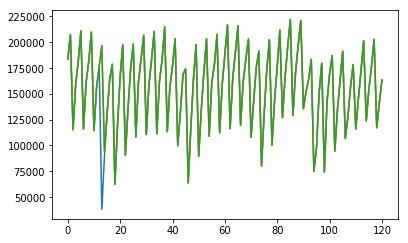

In [15]:
plt.plot(nc_expt1['wind_obcounts'][:].sum(axis=1))
plt.plot(nc_expt2['wind_obcounts'][:].sum(axis=1))
plt.plot(nc_expt3['wind_obcounts'][:].sum(axis=1))

In [16]:
nc_expt1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): plevs(23), time(121)
    variables(dimensions): float32 plevs(plevs), float32 plevs_up(plevs), float32 plevs_down(plevs), float64 times(time), float32 omf_rmswind(time,plevs), float32 omf_rmstemp(time,plevs), float32 omf_biastemp(time,plevs), int32 temp_obcounts(time,plevs), int32 wind_obcounts(time,plevs)
    groups: 